### Test de base de la pipeline en créant une version très simple

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath("../../"))
from pipeoptz import Pipeline, Node

In [2]:
def add(x, y):
    print(f"add({x}, {y})")
    return x + y

def multiply(a, b):
    print(f"multiply({a}, {b})")
    return a * b

def subtract(x, y):
    print(f"subtract({x}, {y})")
    return x - y

In [3]:
pipeline = Pipeline("Example Pipeline", "This is an example pipeline.")

# Création des noeuds
node_a = Node("A", add, fixed_params={"x": 5, "y": 3}) # A = 5 + 3 = 8
node_b = Node("B", multiply, fixed_params={"b": 10})   # B = A * 10 (A vient de node_a)
node_c = Node("C", subtract, fixed_params={"y": 2})    # C = B - 2 (B vient de node_b)
node_d = Node("D", add, fixed_params={"x": 1})         # D = A + 1 (A vient de node_a)
node_e = Node("E", multiply)                           # E = C * D

# Ajout des noeuds au pipeline avec leurs dépendances
pipeline.add_node(node_a)
pipeline.add_node(node_b, predecessors={"a": "A"})
pipeline.add_node(node_c, predecessors={"x": "B"})
pipeline.add_node(node_d, predecessors={"y": "A"})
pipeline.add_node(node_e, predecessors={"a": "C", "b": "D"})

In [4]:
print("Ordre topologique:", pipeline.static_order())
# Attendu: ['A', 'B', 'D', 'C', 'E'] ou ['A', 'D', 'B', 'C', 'E'] (selon l'implémentation exacte des successeurs)

Ordre topologique: ['A', 'B', 'D', 'C', 'E']


In [5]:
outputs = pipeline.run()
print("Résultats du pipeline:", outputs, "\n")
# Attendu: {'A': 8, 'B': 80, 'D': 9, 'C': 78, 'E': 702} (l'ordre dans le dict peut varier)

add(5, 3)
multiply(8, 10)
add(1, 8)
subtract(80, 2)
multiply(78, 9)
Résultats du pipeline: ('E', {'A': 8, 'B': 80, 'D': 9, 'C': 78, 'E': 702}, (0.0005934238433837891, {'A': 0.00045800209045410156, 'B': 4.744529724121094e-05, 'D': 4.696846008300781e-05, 'C': 2.0503997802734375e-05, 'E': 2.0503997802734375e-05})) 



In [6]:
pipeline.to_dot("pipeline_example.dot", generate_png=True)
print("Fichier .dot et .png généré.")

Fichier .dot et .png généré.


In [7]:
pipeline.to_json("pipeline_example.json")
print("Fichier .json générés.")

Fichier .json générés.


In [8]:
print("\nChargement du pipeline depuis JSON et exécution:")
loaded_pipeline = Pipeline.from_json("pipeline_example.json")
loaded_outputs = loaded_pipeline.run()
print("Résultats du pipeline chargé en JSON:", loaded_outputs)


Chargement du pipeline depuis JSON et exécution:
add(5, 3)
multiply(8, 10)
add(1, 8)
subtract(80, 2)
multiply(78, 9)
Résultats du pipeline chargé en JSON: ('E', {'A': 8, 'B': 80, 'D': 9, 'C': 78, 'E': 702}, (0.00019073486328125, {'A': 7.843971252441406e-05, 'B': 3.504753112792969e-05, 'D': 2.6702880859375e-05, 'C': 2.2649765014648438e-05, 'E': 2.7894973754882812e-05}))



Test avec un cycle:
Erreur attendue détectée: Erreur de préparation de la pipeline: Le graphe contient un cycle, le tri topologique est impossible.


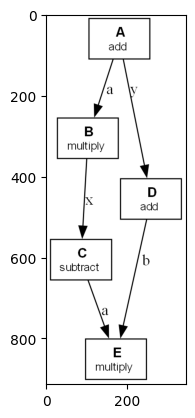

In [9]:
# Test de cycle
print("\nTest avec un cycle:")
pipeline_cycle = Pipeline("Cycle Pipeline")
node_x = Node("X", add, {"x":1})
node_y = Node("Y", add, {"x":1})
pipeline_cycle.add_node(node_x, predecessors={"y": "Y"})
pipeline_cycle.add_node(node_y, predecessors={"y": "X"})
try:
    pipeline_cycle.run()
except ValueError as e:
    print(f"Erreur attendue détectée: {e}")
plt.imshow(Image.open("pipeline_example.png"))